In [1]:
import sympy as sym
from IPython.display import display,Math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [5]:
x = sym.symbols('x')
fx = x**2
dfx = sym.diff(fx)

In [6]:
# leibniz notation (germany)
display(Math('f(x) = %s \\quad \\frac{df}{fx}=%s'%(sym.latex(fx),sym.latex(dfx))))

<IPython.core.display.Math object>

In [7]:
# logrange notation (english)
display(Math('f(x) = %s \\quad f\'=%s'%(sym.latex(fx),sym.latex(dfx))))
# f prime

<IPython.core.display.Math object>

In [8]:
# newton notations(france)
display(Math('f(x) = %s \\quad \\dot{f}=%s'%(sym.latex(fx),sym.latex(dfx))))



<IPython.core.display.Math object>

In [9]:
import sympy.plotting.plot as symplot

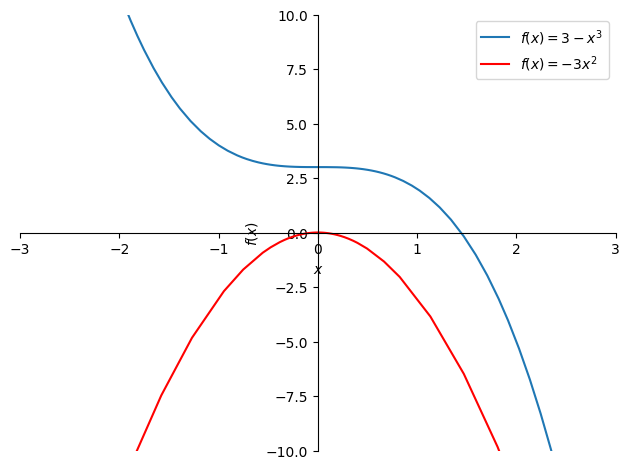

In [17]:
fx = 3 - x**3

p = symplot(fx, (x,-3,3),show=False)
p.extend(symplot(sym.diff(fx),show=False))
p[1].line_color = 'r'
p[0].label='$f(x) = %s$' % sym.latex(fx)
p[1].label='$f(x) = %s$' % sym.latex(sym.diff(fx))
p.legend = True
p.ylim = [-10,10]
p.xlim = [-3,3]

p.show()

In [18]:
x = sym.symbols('x')
f = 3 + 2*x - 5*x**2 + 7*x**4
g = 4*x**2 + x**5


In [23]:
df = sym.diff(f)
dg = sym.diff(g)

d_fxg = sym.diff(f*g)
df_x_dg = sym.diff(f) * sym.diff(g)

d_fplus_g = sym.diff(f+g)

display(Math('\\text{without applying the product rule.}'))
display(Math('\\quad (f\\times g)\' = %s' % sym.latex(sym.expand(d_fxg))))
display(Math('\\quad f\'\\times g\' = %s'% sym.latex(sym.expand(df_x_dg))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
display(Math('\\text{with applying the product rule.}'))
display(Math('\\quad (f\\times g)\' = %s' % sym.latex(sym.expand(d_fxg))))
display(Math('\\quad f\'\\times g + f\\times g\' = %s'% sym.latex(sym.expand(df*g + f*dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
display(Math('(f+g)\' = %s' %(sym.latex(sym.expand(d_fplus_g)))))

<IPython.core.display.Math object>

In [27]:
display(Math('f\'+g\' = %s' %(sym.latex(sym.expand(df + dg)))))

<IPython.core.display.Math object>

In [31]:
q = sym.symbols('q')
print(sym.diff(sym.cos(q)))
print(sym.diff(sym.sin(q)))


-sin(q)
cos(q)


In [33]:
f = sym.cos(q)
for i in range(0,8):
    display(Math('\\frac{d}{dx}%s = %s'%(sym.latex(f), sym.latex(sym.diff(f)))))
    f = sym.diff(f)
    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

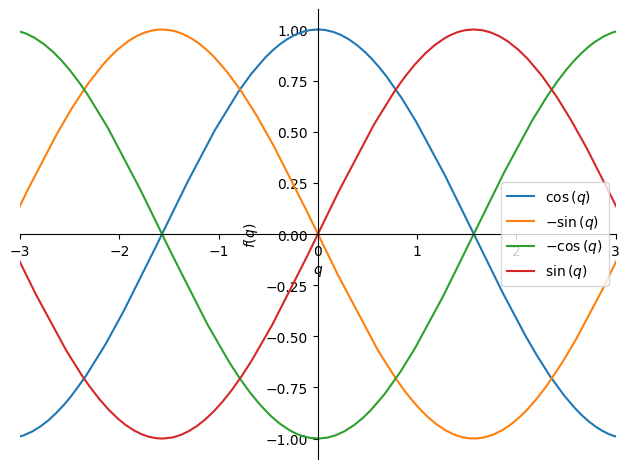

In [42]:
f = sym.cos(q)
for i in range(0,4):
    if i == 0:
        # p = symplot(f, show=False,label=f,line_color=[i/5,i/3,i/5])
        p = symplot(f, show=False,label=f)

    else:
        # p.extend(symplot(f, show=False, label=f,line_color=[i/5,i/3,i/5]))
        p.extend(symplot(f, show=False, label=f))

    f = sym.diff(f)
p.legend = True
p.xlim = [-3,3]
p.show()

a + cos(x + sin(x))


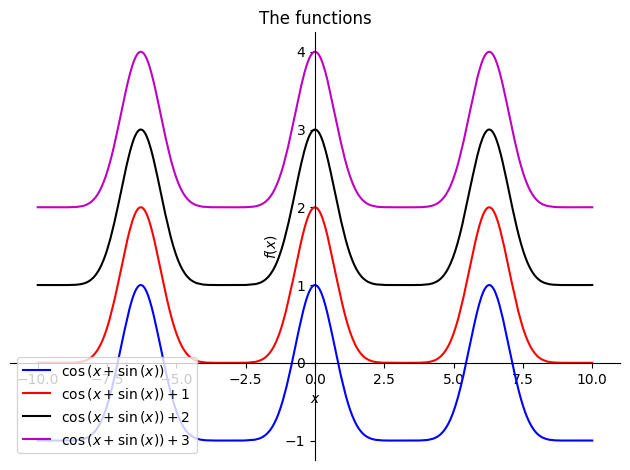

-(cos(x) + 1)*sin(x + sin(x))
-(cos(x) + 1)*sin(x + sin(x))
-(cos(x) + 1)*sin(x + sin(x))
-(cos(x) + 1)*sin(x + sin(x))


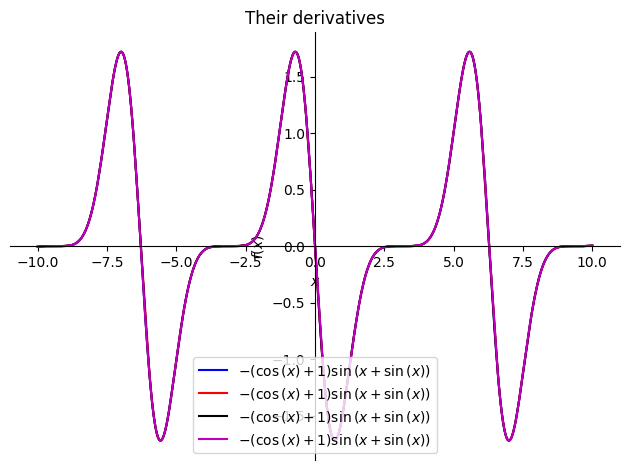

In [66]:
x,a = sym.symbols('x,a')
f = sym.cos(x + sym.sin(x)) + a
print(f)
colors='brkm'
for ai in range(0,4):
    if ai == 0:
        p = symplot(f.subs(a,ai), show=False,label=f.subs(a,ai),line_color=colors[0])
    else:
        p.extend(symplot(f.subs(a,ai), show=False,label=f.subs(a,ai),line_color=colors[ai]))

p.title = 'The functions'
p.legend = True
p.show()


for ai in range(0,4):
    print(sym.diff(f.subs(a,ai)))
    if ai == 0:
        p = symplot(sym.diff(f.subs(a,ai)), show=False,label=sym.diff(f.subs(a,ai)),line_color=colors[0])
    else:
        p.extend(symplot(sym.diff(f.subs(a,ai)), show=False,label=sym.diff(f.subs(a,ai)),line_color=colors[ai]))

p.title = 'Their derivatives'
p.legend = True
p.show()

In [67]:
x = sym.symbols('x')
f = x**2
df = sym.diff(f)

xa = 1

fa = f.subs(x,xa)
fa

1

In [68]:
dfa = df.subs(x, xa)
dfa

2

In [70]:
xx = np.linspace(-2,2,200)
f_fun = sym.lambdify(x,f)(xx)

df_fun =  sym.lambdify(x,df)(xx)

tanline = dfa * (xx -xa) + fa

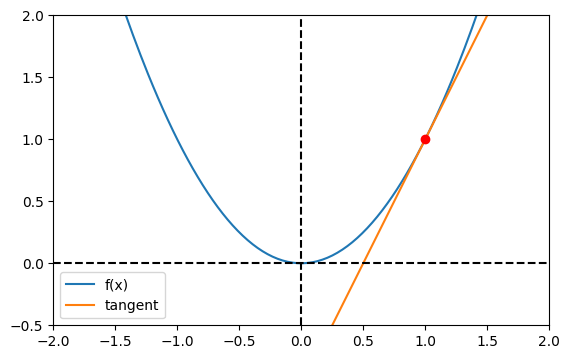

In [81]:
plt.plot(xx, f_fun, label='f(x)')
plt.plot(xx, tanline,label='tangent')
plt.plot(xa,fa,'ro')
plt.axis('square')
plt.axis([-2,2,-.5,2])
ax = plt.gca()
plt.plot(ax.get_xlim(), [0,0],'k--')
plt.plot([0,0],ax.get_ylim(), 'k--')
plt.legend()

In [121]:
def compute_tangent(f, xa, bnds):
    df = sym.diff(f)
    fa = f.subs(x,xa)
    dfa = df.subs(x,xa)
    
    xx = np.linspace(bnds[0],bnds[1],200)
    return dfa * (xx -xa) + fa




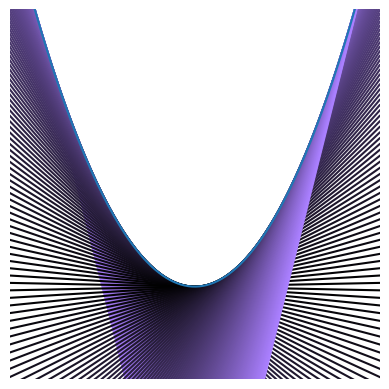

In [124]:
x = sym.symbols('x')
f = x**2

xx = np.linspace(-2,2,200)
ffun = sym.lambdify(x,f)(xx)
for a in xx:
    y = compute_tangent(f, a, xx[[0,-1]])
    plt.plot(xx,y, color=[abs(a)/3,abs(a)/4,abs(a)/2])
plt.plot(xx, ffun)
plt.axis('square')
plt.axis([-2,2,-1,3])
plt.axis('off')
plt.show()
